# Import des données et nettoyage 

* Structure des données, type de variables
* Résumé statistique
* Données manquantes


In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
import nltk
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, RandomizedSearchCV
import pickle
import warnings
from scipy.stats import skew
from scipy.stats import norm
from scipy import stats
#Model 
from sklearn.preprocessing import StandardScaler 
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%config InlineBackend.figure_format = 'retina'

In [2]:
file='C:/Users/Hamada/Documents/Docs Hamada/ML/Allianz/act_couv.csv'
data = pd.read_csv(file, sep= ';')

In [3]:
data.head()

,description,class
0,entreprises de menuiserie fabricant de porte p...,False
1,cheminees accessoires specialiste du fer forg...,False
2,bricolage outillage reproduction de cle robin...,False
3,vente pose de revetements de sols et de murs ...,False
4,vente installation de chauffage vente inst...,True


In [4]:
data.shape

(6663, 2)

In [5]:
data.iloc[0,0]

'entreprises de menuiserie fabricant de porte produits portail aluminium porte d entree porte d entree en aluminium porte de garage portes d entree alu  entreprises de menuiserie portes de garage portes  portails magasins de meubles '

In [6]:
data.describe()

,description,class
count,6663,6663
unique,3341,2
top,entreprises d electricite generale,False
freq,566,5705


In [7]:
data.groupby('class').describe()

description                                                    
            count unique                                     top freq
class                                                                
False        5705   2827  entreprises d electricite generale      561
True          958    580           entreprises de maconnerie      117

In [8]:
data.isnull().sum() / data.shape[1]

description    0.0
class          0.0
dtype: float64

** Remarque : **

On constate qu'il n y a pas de valeurs manquantes.

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6663 entries, 0 to 6662
Data columns (total 2 columns):
description    6663 non-null object
class          6663 non-null bool
dtypes: bool(1), object(1)
memory usage: 58.6+ KB


# Analyse et Manipulation des données textuelles 


In [10]:
data['length']=data['description'].apply(len)

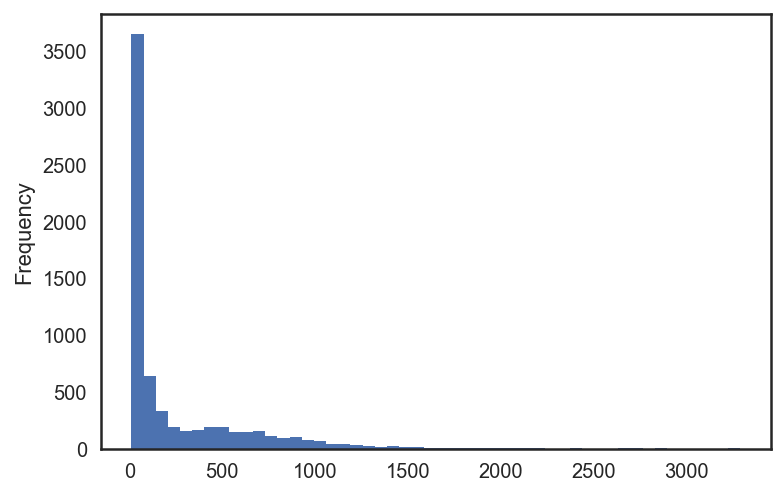

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data['length'].plot.hist(bins=50)

In [12]:
data['length'].describe()

count    6663.000000
mean      242.229326
std       352.565858
min        11.000000
25%        29.000000
50%        56.000000
75%       352.000000
max      3287.000000
Name: length, dtype: float64

Certaines descriptions sont trop longues.

In [13]:
data[data['length']==3287]['description'].iloc[0]

'fenetres devis gratuit  menuiseries sur mesure  fenetres pvc  alu  volets roulants  battants  portes  stores fabrication sur mesure  pose de menuiseries en aluminium  pvc  bois renovation de fenetre en bois  renovation de fenetre en pvc menuiserie pvc  alu et bois  volet battant et roulant  conception d escaliers porte fenetre en pvc  pose de fenetre  renovation de fenetre  baie en aluminium double fenetre  fenetre a double vitrage  fenetre a la francaise  fenetre alu  pvc porte fenetre en aluminium  porte fenetre en bois  porte fenetre sur mesure travaux tous corps d etat  gros oeuvre  peinture  isolation  revetement de sols  de murs suivi de projet  conseils sur le choix des produits  devis sur demande dressing et mobilier sur mesure  vitrage de fenetre  volet  isolation phonique isolation thermique  porte fenetre  double vitrage  motorisation  pilotage a distance pose de fenetre  brise soleil  remplacement de vitre  baie vitree pvc  fenetre acier renovation de fenetre  garantie dec

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000218A3AAD0F0>,
      dtype=object)

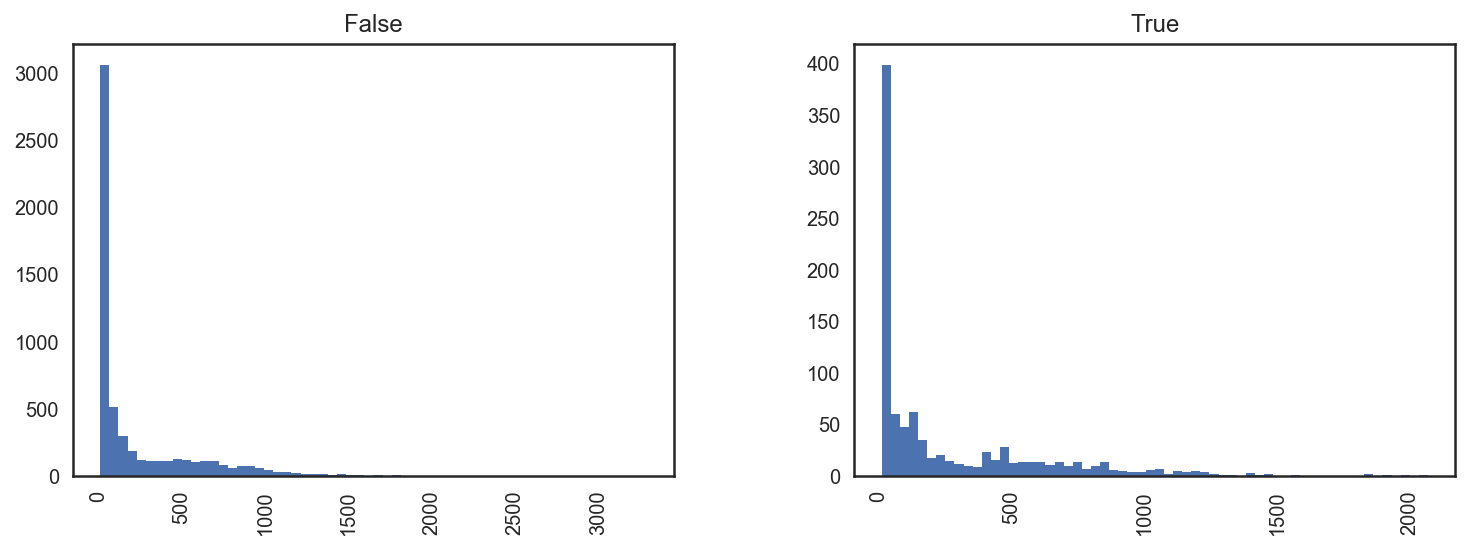

In [14]:
data.hist(column='length',by='class',bins=60,figsize=(12,4))

On peut remarquer que les descriptions TRUE ont en général plus de caractères

In [15]:
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.corpus import stopwords
from nltk import word_tokenize

In [16]:
from nltk.stem.snowball import FrenchStemmer
from nltk.corpus import stopwords
stemmer = FrenchStemmer()
stopwords = set(stopwords.words('french'))

In [17]:
def review_desc(d):
    # converting to lowercase
    d = d.lower()
    # removing stopwords
    d = [word for word in d.split() if word not in stopwords]
    # using a stemmer
    d = " ".join([stemmer.stem(word) for word in d])
    return d

In [18]:
data['description'] = data['description'].apply(review_desc)

In [19]:
data.iloc[0,0]

'entrepris menuiser fabric port produit portail aluminium port entre port entre aluminium port garag port entre alu entrepris menuiser port garag port portail magasin meubl'

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
df = vectorizer.fit_transform(data['description'])

feature_names=vectorizer.get_feature_names()

dense=df.todense()
denselist=dense.tolist()
df=pd.DataFrame(denselist,columns=feature_names)

In [21]:
df.head()

,00,003,01,02,03,032,04,0562967874,06,064,...,zinc,zingag,zinguer,zingueur,zodiac,zoffany,zolpan,zon,zurfluh,zyxel
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modélisation 

* Validation des méthodes et tuning
* Evaluation de la performance
* Importance des variables
* Comparaison des modèles


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, data['class'], test_size = 0.2, random_state = 1)


** AdaBoostClassifier **

In [23]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

params = { 'n_estimators': [16, 32] }
gs = GridSearchCV(AdaBoostClassifier(n_estimators=100), params, cv=4)
ada =gs.fit(X_train,y_train)
print(ada.best_estimator_)


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=32, random_state=None)


In [24]:
y_pred_class = ada.best_estimator_.predict(X_test)

from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9099774943735934

** Random Forest **

In [25]:
from sklearn.ensemble import RandomForestClassifier

params={ 'n_estimators': [16, 32] }
gs = GridSearchCV(AdaBoostClassifier(n_estimators=100), params, cv=4)

rf=gs.fit(X_train, y_train)

y_pred_class = rf.best_estimator_.predict(X_test)

metrics.accuracy_score(y_test, y_pred_class)

0.9099774943735934

** Logistic regression **

In [27]:
from sklearn import linear_model

In [28]:
lr = linear_model.LogisticRegression()

%time lr.fit(X_train, y_train)

y_pred_class = lr.predict(X_test)

metrics.accuracy_score(y_test, y_pred_class)

Wall time: 4.11 s


0.913728432108027

** Lasso (Logistic Regression with L1 & L2 regularization) **

In [29]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=linear_model.LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=4)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l2'}
accuracy : 0.9151969981238274


In [30]:
logreg2=linear_model.LogisticRegression(C=1,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.913728432108027


** SVM **

In [32]:
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [34]:
y_pred = svm.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

[[1140    9]
 [ 107   77]]


In [36]:
metrics.accuracy_score(y_test, y_pred)

0.9129782445611403

In [37]:
#from sklearn.svm import SVC
#params=[
#        {'kernel': ['linear'], 'C': [1, 10]},
#        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]}]
#gs = GridSearchCV(SVC(), params, cv=4)
#md =gs.fit(X_train,y_train)
#print(md.best_params_)

In [38]:
#y_pred = md.best_estimator_.predict(X_test)
#md.accuracy_score(y_test, y_pred)

Malheuresement, je n'ai pas pu faire le tunning des paramètres dans un temps raisonable pour SVM, à cause des performances de mon pc.

** KNN **

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')

knn.fit(X_train, y_train)

y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.8964741185296324

In [40]:
#from sklearn.neighbors import KNeighborsClassifier
#k_range = list(range(1, 31))
#param_grid = dict(n_neighbors=k_range)
#knn = KNeighborsClassifier()
#grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy')
#grid.fit(X_train, y_train)
#print(grid.best_score_)
#print(grid.best_params_)

Malheuresement, je n'ai pas pu faire le tunning des paramètres dans un temps raisonable pour KNN, à cause des performances de mon pc.

# Conclusions :



Après avoir réalisé les différentes étapes du processus à savoir : la préparation , l'exploration, et la modélisation, nous avons appliqué les différents modèles de classification (même si je n'ai pas pu faire le tunning des paramètres pour SVM et KNN). On conclut, que la regression logistique a le meilleur  accuracy  sur le jeu de test 0.913728 